In [9]:
from commons import *

In [23]:
# read in data
df = pd.read_csv("data/runtimes/runtimes_atomic_nooutliers.csv")
datasets = pd.unique(df["openmlid"])
algorithms = pd.unique(df["algorithm"])
df

,openmlid,totalsize,algorithm,algorithmoptions,seed,fitsize,numattributes,numlabels,numnumericattributes,numsymbolicattributes,numberofcategories,numericattributesafterbinarization,totalvariance,attributestocover50pctvariance,attributestocover90pctvariance,attributestocover95pctvariance,attributestocover99pctvariance,applicationsize,fittime,applicationtime
0,3,1600.0,ibk,NaN,0,100,100,2.0,64.0,36.0,74.0,104.0,8.029755e+00,31.0,69.0,75.0,79.0,1500.0,21,494.0
1,3,1600.0,ibk,NaN,1,100,100,2.0,64.0,36.0,74.0,104.0,8.035284e+00,31.0,69.0,75.0,79.0,1500.0,41,473.0
2,3,1600.0,ibk,NaN,0,100,2000,2.0,1964.0,36.0,74.0,2004.0,1.666260e+02,911.0,1745.0,1859.0,1954.0,1500.0,23,15952.0
3,3,11500.0,ibk,NaN,0,10000,100,2.0,64.0,36.0,74.0,104.0,9.907828e+00,34.0,82.0,88.0,95.0,1500.0,54,10365.0
4,6,1600.0,ibk,NaN,0,100,100,26.0,100.0,0.0,0.0,100.0,8.749769e+01,7.0,16.0,45.0,88.0,1500.0,15,541.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33306,1116,1600.0,kstar,NaN,1,100,2000,2.0,1998.0,2.0,6700.0,8698.0,5.255841e+05,7.0,60.0,81.0,119.0,1500.0,4,137206.0
33307,1119,1600.0,kstar,NaN,1,100,100,2.0,92.0,8.0,99.0,190.0,1.050826e+10,1.0,1.0,1.0,1.0,1500.0,1,6568.0
33308,1119,1600.0,kstar,NaN,0,100,2000,2.0,1992.0,8.0,99.0,2090.0,1.050826e+10,1.0,1.0,1.0,1.0,1500.0,3,154032.0
33309,1120,1600.0,kstar,NaN,0,100,100,2.0,100.0,0.0,0.0,100.0,3.488133e+07,1.0,1.0,1.0,1.0,1500.0,1,7311.0


In [24]:
dfDatasets = pd.read_csv("data/datasets.csv")

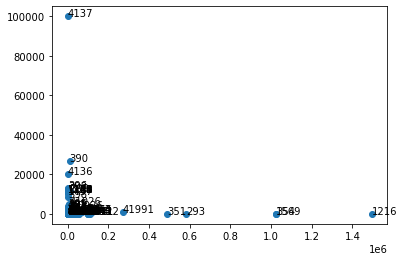

In [25]:
fig, ax = plt.subplots()
ax.scatter(dfDatasets["numinstances"].values, dfDatasets["numattributes"].values)
for i, row in dfDatasets.iterrows():
    ax.text(row["numinstances"], row["numattributes"], row["openmlid"])

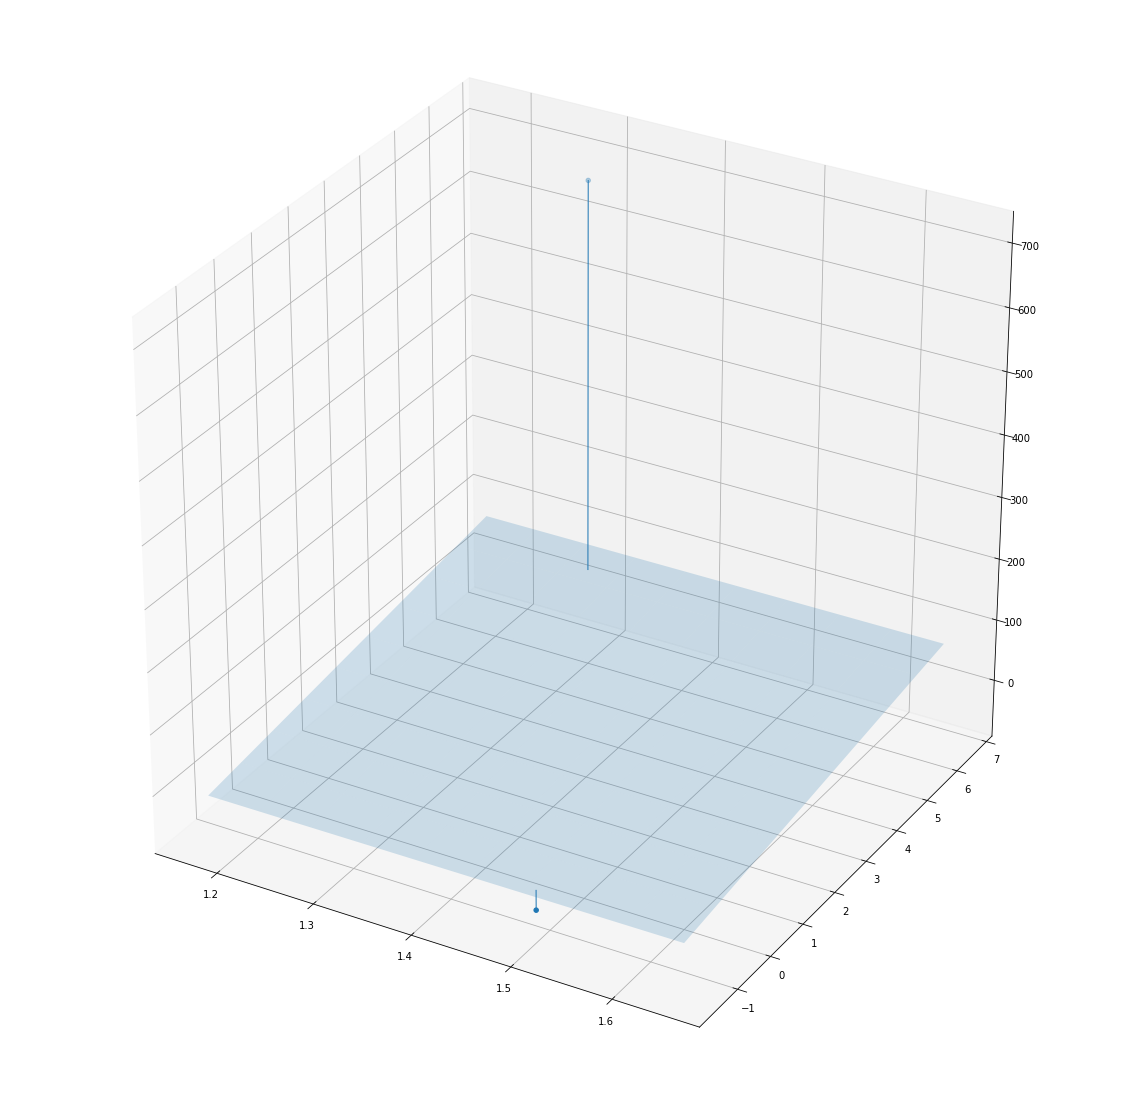

In [26]:
def plotPlane(a1, a2, intersept=0, x_from = -1, x_to = 1, y_from = -1, y_to = 1, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    
    # create meshgrid
    x = np.linspace(x_from,x_to,10)
    y = np.linspace(y_from,y_to,10)
    X,Y = np.meshgrid(x,y)
    Z=a1*X + a2*Y + intersept

    surf = ax.plot_surface(X, Y, Z, alpha=0.2)

def scatterplane(X, Y, Z, a1, a2, intersept=0, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    
    from_x = min(X) - np.abs(min(X)) * 0.1
    to_x = max(X) + np.abs(max(X)) * 0.1
    from_y = min(Y) - np.abs(min(Y)) * 0.1
    to_y = max(Y) + np.abs(max(Y)) * 0.1
    
    # plot plane
    plotPlane(a1, a2, intersept, from_x, to_x, from_y, to_y, ax=ax)
    
    # scatter points
    ax.scatter(X, Y, Z)
    
    # connect points with plane
    for i, x in enumerate(X):
        y = Y[i]
        z = Z[i]
        plane = a1*x + a2*y + intersept
        minZ = min(plane, z)
        maxZ = max(plane, z)
        ax.plot([x,x], [y,y], [minZ,maxZ], color="C0", linewidth=1)

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
scatterplane([1.5,1.3], [-1.4, 6], [-40, 695], 4, 10,ax=ax)

[100.0, 2311.1111111111113, 4522.222222222223, 6733.333333333334, 8944.444444444445, 11155.555555555557, 13366.666666666668, 15577.77777777778, 17788.88888888889, 20000.0, 20000.0, 28888.88888888889, 37777.77777777778, 46666.666666666664, 55555.555555555555, 64444.444444444445, 73333.33333333333, 82222.22222222222, 91111.11111111111, 100000.0]
209


/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


(100, 1000000)

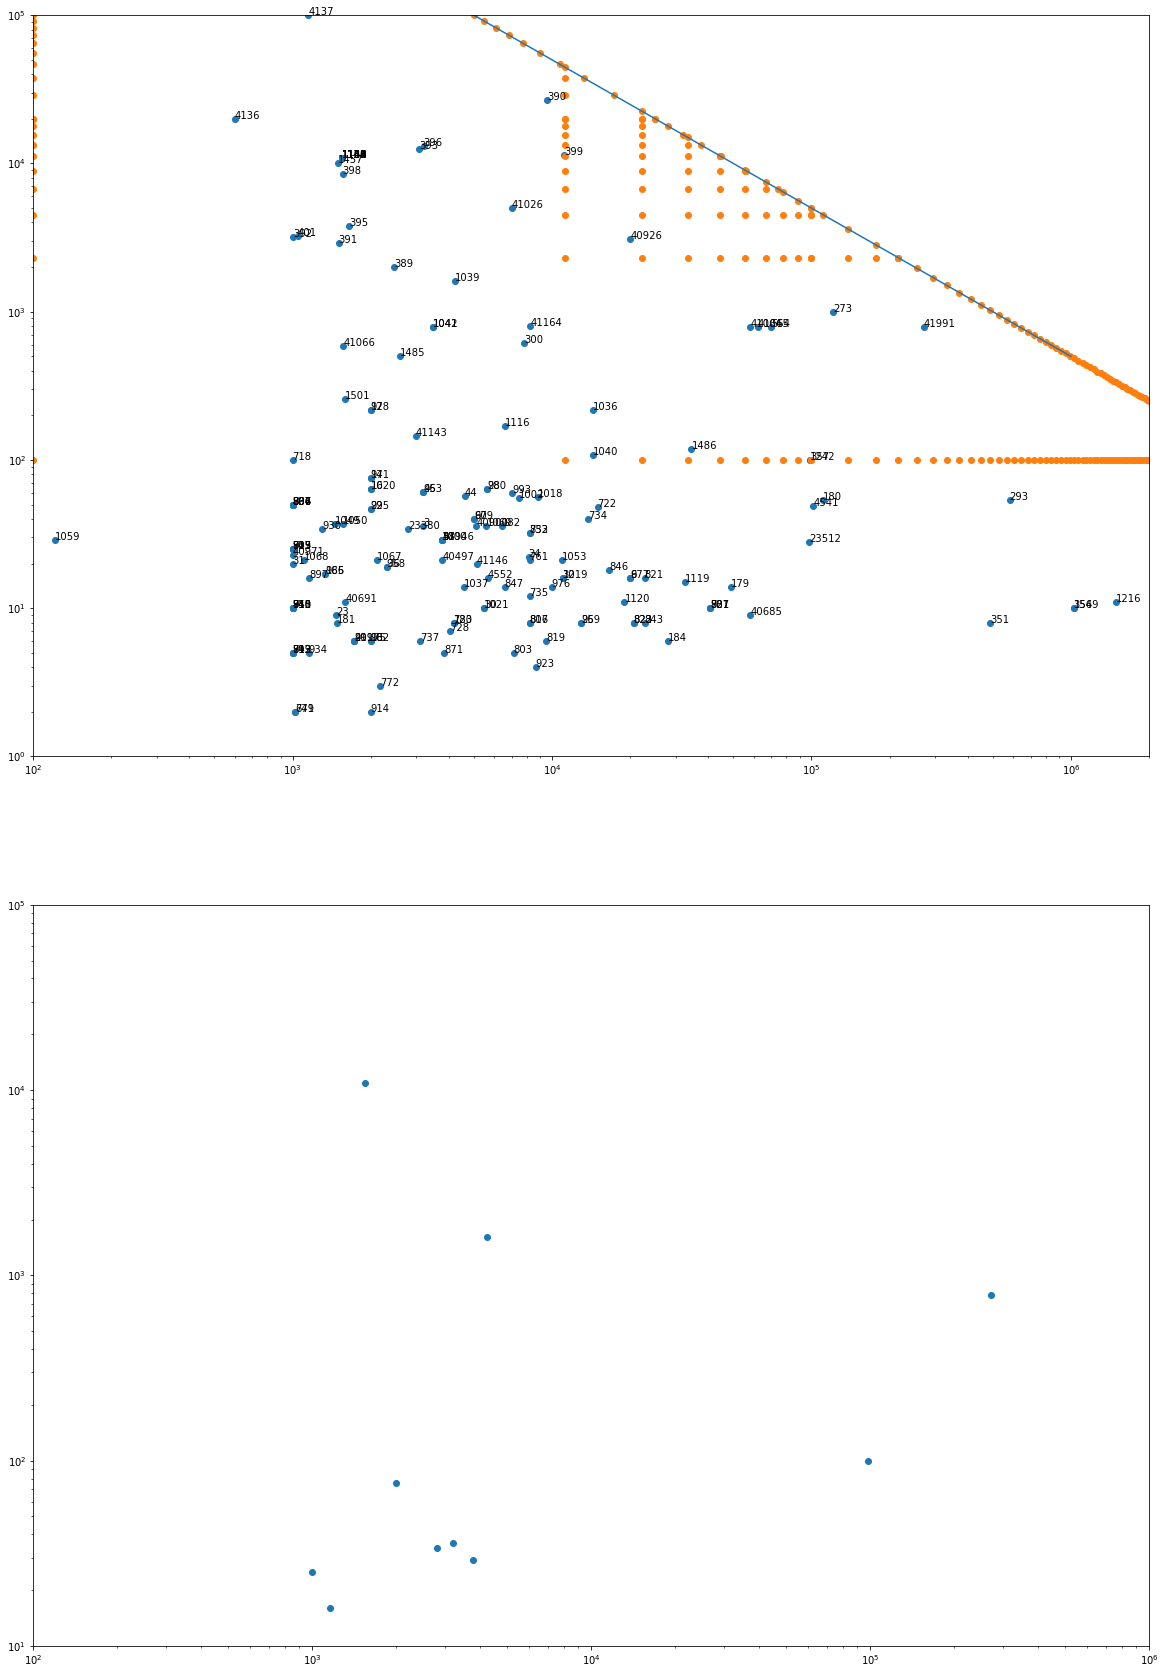

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(20,30))
dsSample = [3, 38, 357, 723, 807, 897, 971, 1039, 1138, 23380, 41991]
dfSample = dfDatasets[dfDatasets["openmlid"].isin(dsSample)]
a = ax[0]
a.scatter(dfDatasets["numinstances"].values, dfDatasets["numattributes"].values)
for i, row in dfDatasets.iterrows():
    #if row["numattributes"] < 5000 and row["numinstances"] <= 100000:
    a.text(row["numinstances"], row["numattributes"], row["openmlid"])
a.set_yscale("log")
a.set_xscale("log")
a.set_ylim([1, 10**5])
a.set_xlim([100, 2*10**6])
XCAND = list(np.linspace(10**2, 10**5, 10)) + list(np.linspace(10**5, 2*10**6, 50))
YCAND = list(np.linspace(10**2, 2*10**4, 10)) + list(np.linspace(2*10**4, 10**5,10))
print(YCAND)
lim = 5*10**8
P = []
for x in XCAND:
    for y in YCAND:
        if x * y > lim:
            P.append((np.floor(x),np.floor(lim/x)))
            break
        P.append((np.floor(x),np.floor(y)))
for y in YCAND:
    P.append((np.floor(lim/y),np.floor(y)))
P = np.array(P)
print(len(P))
a.scatter(P[:,0], P[:,1])
dom = np.linspace(0, 10**6, 1000)
a.plot(dom, [lim/x for x in dom])
a = ax[1]
a.scatter(dfSample["numinstances"].values, dfSample["numattributes"].values)
a.set_yscale("log")
a.set_xscale("log")
a.set_ylim([10, 100000])
a.set_xlim([100, 1000000])


/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


(0.0, 100000.0)

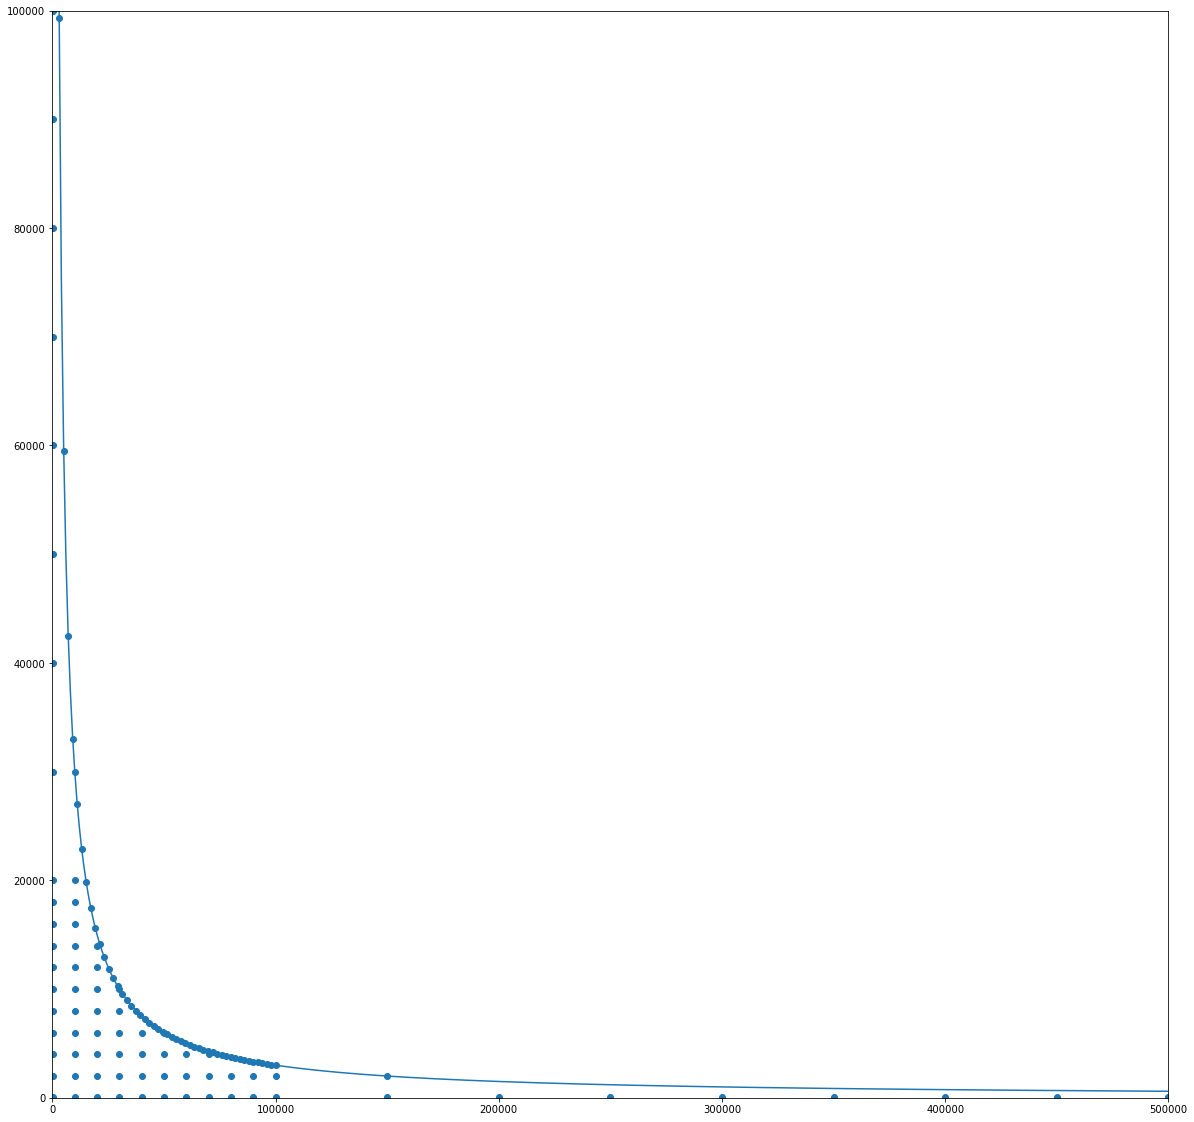

In [105]:
P = []
XCAND = [100,  10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000]
YCAND = [100, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
for x in XCAND:
    if x <= 10**6:
        for y in YCAND:
            prod = x * y
            if prod <= lim:
                P.append((x,y))
for x in np.linspace(1000, 100000, 50):
    P.append((x, np.floor(lim/x)))
P = np.array(P)
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(dom, [lim/x for x in dom])
ax.scatter(P[:,0], P[:,1])
ax.set_xlim([0, 5*10**5])
ax.set_ylim([0, 10**5])

# 1. Visualization of Overall Runtime Distribution

In [93]:
T = [(x + 1)**2 for x in range(100)]
Mfit = []
Mapp = []
L = len(df)
T.append(10**4)
for t in tqdm(T):
    Mfit.append(len(df.query("fittime <= " + str(t))) / L)
    Mapp.append(len(df.query("applicationtime <= " + str(t))) / L)

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


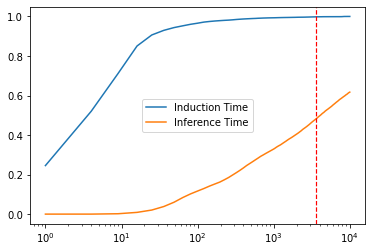

In [14]:
plt.figure()
plt.plot(T, Mfit)
plt.plot(T, Mapp)
plt.xscale("log")
plt.axvline(3600, color="red", linestyle="--", linewidth="1.2")
plt.legend(["Induction Time", "Inference Time"])
#plt.title("Cummulative Empirical Distribution of All Runtimes")
plt.savefig("plots/runtimedistributions.pdf")
pass

# Visualization of Runtimes per atomic algorithm/dataset on 70/30 splits

In [21]:
def getValClosestTo(df, column, value):
    col = df[column].values
    absolute_val_array = np.abs(col - value)
    smallest_difference_index = absolute_val_array.argmin()
    closest_element = col[smallest_difference_index]
    return closest_element

In [22]:
# Compute, for each dataset, the datapoints for the 70/30 split
datasets = df[["openmlid", "totalsize"]].drop_duplicates().values
classifiers = np.unique(df[["algorithm"]].values)

In [23]:
# Get for each dataset and each classifier the performance on the 70/30 split
tableTrain = np.empty((len(datasets), len(classifiers)), dtype=object)
tableTest = np.empty((len(datasets), len(classifiers)), dtype=object)
for i, dataset in tqdm(enumerate(datasets)):
    dataOnThisDataset = df.query("openmlid == '" + str(dataset[0]) + "'")
    desiredTrainDataSize = np.round(dataset[1] * 0.7)
    desiredTestDataSize = dataset[1] - desiredTrainDataSize
    for j, classifier in enumerate(classifiers):
        dataOnThisDatasetAndClassifier = dataOnThisDataset.query("algorithm == '" + classifier + "'")
        if len(dataOnThisDatasetAndClassifier) > 0:
            bestAvailable70PctTrainData = getValClosestTo(dataOnThisDatasetAndClassifier, "fitsize", desiredTrainDataSize)
            bestAvailable30PctTestData = getValClosestTo(dataOnThisDatasetAndClassifier, "applicationsize", desiredTestDataSize)
            error = np.abs(bestAvailable70PctTrainData + bestAvailable30PctTestData - dataset[1])
            trainData = dataOnThisDatasetAndClassifier.query("fitsize == '" + str(bestAvailable70PctTrainData) + "'")["fittime"]
            testData = dataOnThisDatasetAndClassifier.query("applicationsize == '" + str(bestAvailable30PctTestData) + "'")["applicationtime"]
            testData = testData[~np.isnan(testData)]
            tableTrain[i][j] = trainData.values
            tableTest[i][j] = testData.values
        else:
            tableTrain[i][j] = []
            tableTest[i][j] = []

In [24]:
# Get for each dataset and each classifier the performance on the 70/30 split
table7030 = np.empty((len(datasets), len(classifiers)), dtype=object)
for i, dataset in tqdm(enumerate(datasets)):
    dataOnThisDataset = df.query("openmlid == '" + str(dataset[0]) + "'")
    desiredTrainDataSize = np.round(dataset[1] * 0.7)
    desiredTestDataSize = dataset[1] - desiredTrainDataSize
    for j, classifier in enumerate(classifiers):
        dataOnThisDatasetAndClassifier = dataOnThisDataset.query("algorithm == '" + classifier + "'")
        if len(dataOnThisDatasetAndClassifier) > 0:
            bestAvailable70PctTrainData = getValClosestTo(dataOnThisDatasetAndClassifier, "fitsize", desiredTrainDataSize)
            bestAvailable30PctTestData = getValClosestTo(dataOnThisDatasetAndClassifier, "applicationsize", desiredTestDataSize)
            error = np.abs(bestAvailable70PctTrainData + bestAvailable30PctTestData - dataset[1])
            trainData = dataOnThisDatasetAndClassifier.query("fitsize == '" + str(bestAvailable70PctTrainData) + "'")
            testData = dataOnThisDatasetAndClassifier.query("applicationsize == '" + str(bestAvailable30PctTestData) + "'")
            jointData = trainData.merge(testData, on=["openmlid", "totalsize", "seed", "algorithm"])[["fittime_x", "fittime_y"]]
            table7030[i][j] = jointData.values
        else:
            table7030[i][j] = np.array([])

In [25]:
m = len(datasets)
n = len(classifiers)
t1 = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        t1[i,j] = np.mean(table7030[i,j][:,0]) if len(table7030[i,j]) > 0 else None
t2 = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        t2[i,j] = np.mean(table7030[i,j][:,1]) if len(table7030[i,j]) > 0 else None
t3 = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        runtimes = []
        for row in table7030[i,j]:
            s = 0
            v1 = row[0]
            v2 = row[1]
            if not np.isnan(v1) and not np.isnan(v2):
                s = v1 + v2
            else:
                if not np.isnan(v1):
                    s = v1
                else:
                    s = v2 # either the true value of t2 or none
            runtimes.append(s)
        t3[i][j] = np.mean(runtimes)
meanRuntimes7030Train = t1
meanRuntimes7030Test = t2
meanRuntimes7030Total = t3

/home/felix/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/felix/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
# Fixing this timeout will be important for the further steps
timeout = 300

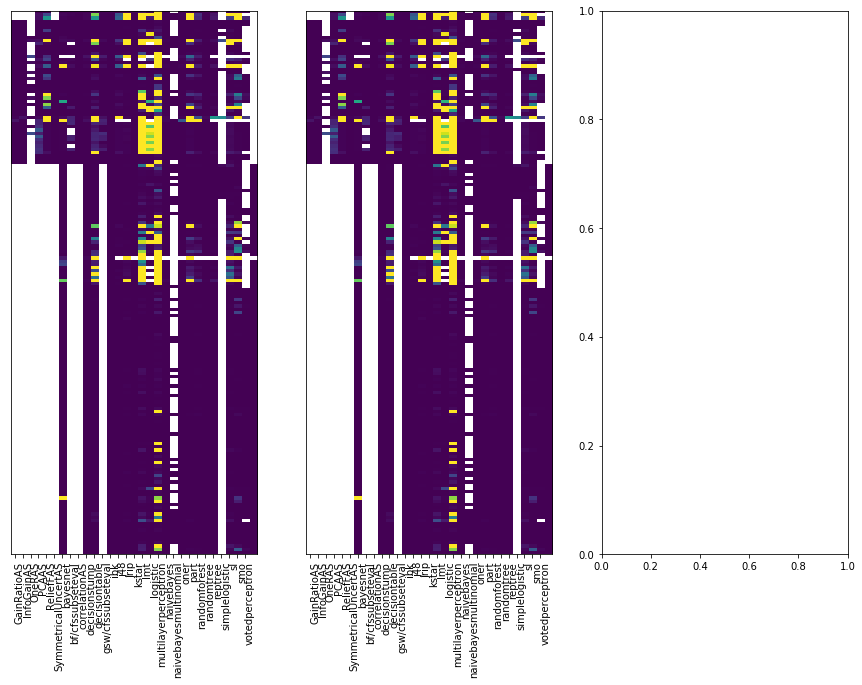

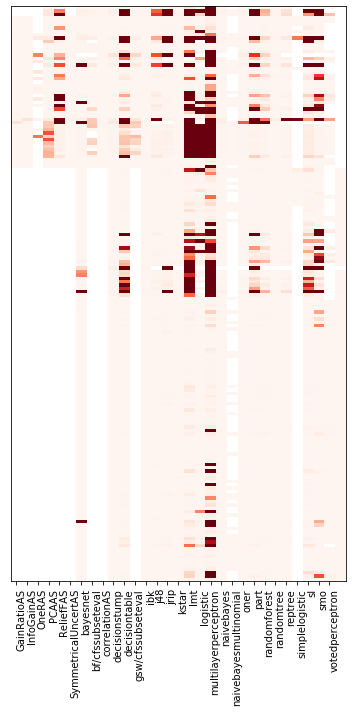

In [54]:
# what is the train and test time of the classifiers on different datasets for 70/30 splits?
timelimit = 20 * 60

fig, ax = plt.subplots(1, 3, figsize=(15,10))
a = ax[0]
im = a.imshow(np.minimum(meanRuntimes7030Train, timelimit), cmap='viridis', vmin=0, vmax=timelimit, aspect="auto")
a.set_xticks(np.arange(len(classifiers) - 1))
a.set_xticklabels(classifiers)
a.set_yticks([])
plt.setp(a.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.savefig("plots/runtime-train.pdf")

a = ax[1]
im = a.imshow(np.minimum(meanRuntimes7030Test, timelimit), cmap='viridis', vmin=0, vmax=timelimit, aspect="auto")
a.set_xticks(np.arange(len(classifiers) - 1))
a.set_xticklabels(classifiers)
a.set_yticks([])
plt.setp(a.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.savefig("plots/runtime-test.pdf")

fig = plt.figure(figsize=(5, 10))
im = plt.imshow(np.minimum(meanRuntimes7030Total, timelimit), cmap='Reds', vmin=0, vmax=timelimit, aspect="auto")
a = fig.axes[0]
a.set_xticks(np.arange(len(classifiers) - 1))
a.set_xticklabels(classifiers)
a.set_yticks([])
plt.setp(a.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.tight_layout()
plt.savefig("plots/runtime-total.pdf")

#cbar = fig.colorbar(im)
pass

## Analyze Prior Dominance on these 70/30 splits

In [55]:
# Analyze the intuitition that one would expect some sort of dominance among algorithms
advTableAvgAbsolute = meanRuntimes7030Total
advTableAvg = np.zeros(advTableAvgAbsolute.shape)
numCases = advTableAvgAbsolute.shape[0]
for i, c1 in enumerate(classifiers):
    #print(c1 + ": " + str(advTableAvgAbsolute[:,i]))
    for j, c2 in enumerate(classifiers):
        if c1 == c2:
            continue
        pairAdvantages = np.where(advTableAvgAbsolute[:,i] <= advTableAvgAbsolute[:,j])[0]
        #print(c1 + "/" + c2 + ": " + str(pairAdvantages))
        dominance = pairAdvantages.size / numCases
        advTableAvg[i][j] = dominance
        if dominance > .85:
            print (c1 + " dominates " + c2 + " in " + str(dominance * 100) + "% of the cases")

bayesnet dominates lmt in 95.88235294117648% of the cases
bayesnet dominates multilayerperceptron in 98.82352941176471% of the cases
bayesnet dominates sl in 85.88235294117646% of the cases
decisionstump dominates decisiontable in 91.76470588235294% of the cases
decisionstump dominates jrip in 87.6470588235294% of the cases
decisionstump dominates lmt in 98.82352941176471% of the cases
decisionstump dominates multilayerperceptron in 99.41176470588235% of the cases
decisionstump dominates part in 86.47058823529412% of the cases
decisionstump dominates randomforest in 89.41176470588236% of the cases
decisionstump dominates sl in 95.88235294117648% of the cases
decisionstump dominates smo in 89.41176470588236% of the cases
decisiontable dominates lmt in 97.6470588235294% of the cases
decisiontable dominates multilayerperceptron in 100.0% of the cases
ibk dominates bayesnet in 86.47058823529412% of the cases
ibk dominates decisiontable in 95.88235294117648% of the cases
ibk dominates j48 i

In [59]:
%%script false --no-raise-error
# What is the comparison of runtimes of classifiers among all datasets?
# Here, we use the canonical splits based on train sizes instead of 70/30 splits
timeouts = [0, 300, 600, 1200]
timeoutIndex = np.where(timeouts == timeout)[0]
advTable = np.zeros([len(timeouts), len(classifiers), len(classifiers)])
pbar = tqdm(total = advTable.size)
for t, to in enumerate(timeouts):
    for i, c1 in enumerate(classifiers):
        dataWithClassifierC1 = df.query("algorithm == '" + str(c1) + "' and fitsize > applicationsize and fittime + applicationtime >= " + str(to))
        for j, c2 in enumerate(classifiers):
            if c1 != c2:
                dataWithClassifierC2 = df.query("algorithm == '" + str(c2) + "' and fitsize > applicationsize  and fittime + applicationtime >= " + str(to))
                join = dataWithClassifierC1.merge(dataWithClassifierC2, on=["openmlid", "totalsize", "seed"])[["algorithm_x", "algorithm_y", "fittime_x", "applicationtime_x", "fittime_y", "applicationtime_y"]]
                vals = join.values
                totalRuntimesX = vals[:,2] + vals[:,3]
                totalRuntimesY = vals[:,4] + vals[:,5]
                advTable[t][i][j] = np.where(totalRuntimesX <= totalRuntimesY)[0].size / len(join) if len(join) > 0 else 0
            pbar.update(1)
pbar.close()

### Compute for each algorithm pair in how many cases the dominance-based pruning would be ok

In [ ]:
%%script false --no-raise-error
# now compute the relative frequency of cases in which classifier 1 is faster than 2
# including training AND test on a 70/30 split
advTableTotal = np.zeros([len(timeouts), len(classifiers), len(classifiers)]) # this is the total advantage on 70/30 splits
disadvTableTotal = np.zeros([len(timeouts), len(classifiers), len(classifiers)]) # this is the total advantage on 70/30 splits
pbar = tqdm(total = advTableTotal.size)
for t, to in enumerate([300]):
    for i, c1 in enumerate(classifiers):
        dataWithClassifierC1 = table7030[:,i]
        for j, c2 in enumerate(classifiers):
            if c1 != c2:
                dataWithClassifierC2 = table7030[:,j]
                scores = []
                negscores = []
                for d, ds in enumerate(datasets[:,0]):
                    #print(c1 + "/" + c2 + " on dataset " + str(d))
                    v1 = dataWithClassifierC1[d]
                    if len(v1) > 0:
                        r1 = np.sum(v1, axis=1)
                        #print("v1: " + str(v1) + ", r1: " + str(r1))
                        
                        casesInWhichC1TimedOut = r1 >= to
                        r1 = r1[casesInWhichC1TimedOut]
                        print(v1)
                        
                        # only proceed for this combination if r1 times out
                        v2 = dataWithClassifierC2[d]
                        if len(v2) > 0:
                            r2 = np.sum(v2, axis=1)
                            #print("v2: " + str(v2) + ", r2: " + str(r2))
                            r2 = r2[r2 >= to]
                            #print(str(r1) + " vs. " + str(r2))
                            score = 0
                            negScore = 0
                            if np.mean(r1) <= np.mean(r2):
                                score += 1
                            else:
                                negScore = +1
                            scores.append(score)
                            negscores.append(negScore)
                advTableTotal[t][i][j] = np.mean(scores)
            pbar.update(1)
pbar.close()

In [263]:
## Second, consider all possible pairs of classifiers
## For each pair, train a binary classifier based on the observed data that will predict the runtime dominance
## i.e. will predict whether c1 runs faster than c2 on a given dataset
models = [[0 for x in range(len(algorithms))] for y in range(len(algorithms))] 
predictabilities_prior = np.zeros([len(algorithms), len(algorithms)])
realizedCuts_prior = np.zeros([len(algorithms), len(algorithms)])
correctlyRealizedCuts_prior = np.zeros([len(algorithms), len(algorithms)])
incorrectlyRealizedCuts_prior = np.zeros([len(algorithms), len(algorithms)])
possibleCuts_prior = np.zeros([len(algorithms), len(algorithms)])
pbar = tqdm(total = len(algorithms) ** 2)
algorithmDFViews = {}
for a in algorithms:
    algorithmDFViews[a] = df[(df["algorithm"] == a) & (df["algorithmoptions"].isnull())]

for i, c1 in enumerate(algorithms):
    dataWithClassifierC1 = algorithmDFViews[c1][["openmlid", "seed", "fitsize", "numattributes", "fittime", "applicationtime"]]
    for j, c2 in enumerate(algorithms):
        if c1 != c2:
            dataWithClassifierC2 = algorithmDFViews[c2]
            join = dataWithClassifierC1.merge(dataWithClassifierC2, on=["openmlid", "seed", "fitsize", "numattributes"])
            inds = join[["fittime_x", "applicationtime_x", "fittime_y", "applicationtime_y"]].dropna().index.values
            join = join.loc[inds]
            targetData = join[["fittime_x", "applicationtime_x", "fittime_y", "applicationtime_y"]].values
            if len(targetData) >= 10: # require certain evaluability
                c1Times = targetData[:,0] + targetData[:,1]
                c2Times = targetData[:,2] + targetData[:,3]
                #for rIndex in range(len(join)):
                #    c1Time = c1Times[rIndex]
                #    c2Time = c2Times[rIndex]
                #    if c1Time > c2Time:
                #        print(str(c1Time) + " vs. " + str(c2Time))
                adjc2Times = []
                for t in c2Times:
                    if t > 10 and t <= 60:
                        t *= 1.1
                    if t > 60:
                        t += 5
                    adjc2Times.append(t)
                y = c1Times <= np.array(adjc2Times)

                # check where c1 and c2 timed out respectively
                casesInWhichC1Timedout = np.where(join["fittime_x"] + join["applicationtime_x"] >= 300)[0]
                rowsInWhichC1Timedout = join.iloc[casesInWhichC1Timedout]
                didPotentiallyDominatedTimeout = (rowsInWhichC1Timedout["fittime_y"] + rowsInWhichC1Timedout["applicationtime_y"] >= 300).values

                predictionScores = []
                cuts = []
                cutScoresPositive = []
                cutScoresNegative = []
                numIterations = 1
                for seed in range(numIterations):
                    allIndices = [x for x in range(len(y)) if not x in casesInWhichC1Timedout]
                    np.random.shuffle(allIndices)
                    trainIndices = allIndices[:int(len(y) * .7)]
                    test1Indices = casesInWhichC1Timedout
                    test2Indices = allIndices[int(len(y) * .7):]
                    Ytrain = y[trainIndices]
                    Ytest1 = y[test1Indices]
                    Ytest2 = y[test2Indices]
                    prediction = np.count_nonzero(Ytrain) / len(Ytrain) > .85 # predict dominance if the rule has an overall confidence of at least this factor

                    print(str(np.count_nonzero(Ytrain) / len(Ytrain)) + " -> " + str(prediction))

                    if len(Ytest2) > 0: # this is to assess the overall validation performance
                        score = np.count_nonzero(prediction == Ytest2) / len(Ytest2)
                        predictionScores.append(score)
                    if len(Ytest1) > 0:
                        attempts = 0
                        correct = 0
                        incorrect = 0
                        for gt in didPotentiallyDominatedTimeout:
                            if prediction:
                                attempts += 1
                                if gt:
                                    correct += 1
                                else:
                                    incorrect += 1

                        scorePositive = correct / attempts if attempts > 0 else 0
                        scoreNegative = incorrect / attempts if attempts > 0 else 0
                        cutScoresPositive.append(scorePositive)
                        cutScoresNegative.append(scoreNegative)
                        cuts.append(attempts)
                
                print("Scores: " + str(predictionScores))
                predictabilities_prior[i][j] = np.nanmean(predictionScores)
                correctlyRealizedCuts_prior[i][j] = np.mean(cutScoresPositive)
                incorrectlyRealizedCuts_prior[i][j] = np.mean(cutScoresNegative)
                realizedCuts_prior[i][j] = np.mean(cuts)
                possibleCuts_prior[i][j] = np.count_nonzero(didPotentiallyDominatedTimeout)
                #activeCutScores[i][j] /= numIterations
                #print(c1 + "/" + c2)
                #print(predictabilities[i][j])
                #print(str(realizedCuts[i][j]) + "/" + str(possibleCuts[i][j]))
                #print(str(correctlyRealizedCuts[i][j]) + " <-> " + str(incorrectlyRealizedCuts[i][j]))
        pbar.update(1)
pbar.close()

0.8750817222377884 -> True
Scores: [0.8692098092643051]
1.0 -> True
Scores: [1.0]
0.9101098025829208 -> True
Scores: [0.9114445034519384]
0.9286547660716369 -> True
Scores: [0.9293493057446229]
0.8685283231035937 -> True
Scores: [0.8768591426071741]
1.0 -> True
Scores: [0.9868421052631579]
0.9050424628450107 -> True
Scores: [0.9079534192269574]
0.8425039093041439 -> False
Scores: [0.15453923357664234]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
0.9000102082482646 -> True
Scores: [0.8990945913747915]
1.0 -> True
Scores: [0.98989898989899]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [0.9795918367346939]
1.0 -> True
Scores: [1.0]
0.9946236559139785 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
0.9956896551724138 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
0.9949494949494949 -> True
Scores: [1.0]
0.9954954954954955 -> True
Scores: [1.0]
0.9946808510638298 -> True
Scores: 

0.778809192770099 -> False
Scores: [0.22353631121102532]
0.9696969696969697 -> True
Scores: [0.9761904761904762]
1.0 -> True
Scores: [1.0]
0.8339877057307158 -> False
Scores: [0.16381024524192786]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
0.9808612440191388 -> True
Scores: [0.9886363636363636]
0.963855421686747 -> True
Scores: [0.8888888888888888]
0.98989898989899 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
0.9823008849557522 -> True
Scores: [0.9375]
0.9921568627450981 -> True
Scores: [0.981651376146789]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
1.0 -> True
Scores: [1.0]
0.9214229867083659 -> True
Scores: [0.9240419708029197]
0.9224713543813371 -> True
Scores: [0.9244901885340515]
1.0 -> True
Scores: [1.0]
0.9411945812807881 -> True
Scores: [0.9393348388421269]
0.9508024598770062 -> True
Scores: [0.9500525148

0.801203309100025 -> False
Scores: [0.20702634880803011]
0.6664961636828645 -> False
Scores: [0.3342716396903589]
0.7834625322997416 -> False
Scores: [0.21754700089525514]
0.6111111111111112 -> False
Scores: [0.38504997827031723]
0.5431211498973306 -> False
Scores: [0.45794392523364486]
0.5728803716608595 -> False
Scores: [0.4244951712028095]
0.5742246726395589 -> False
Scores: [0.42236559139784946]
0.6730172795746566 -> False
Scores: [0.33232235701906415]
0.5421616922631122 -> False
Scores: [0.45235975066785394]
0.528830313014827 -> False
Scores: [0.4681528662420382]
0.6371126634425935 -> False
Scores: [0.37403740374037403]
0.5917269211367076 -> False
Scores: [0.4166233766233766]
0.6267524706963916 -> False
Scores: [0.3793604651162791]
0.6885577165950998 -> False
Scores: [0.3111111111111111]
0.05 -> False
Scores: [1.0]
0.0 -> False
Scores: [1.0]
0.041666666666666664 -> False
Scores: [1.0]
0.391304347826087 -> False
Scores: [0.625]
0.0 -> False
Scores: [1.0]
0.5498257839721254 -> False

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: Mean of empty slice


0.01775147928994083 -> False
Scores: []
0.03954802259887006 -> False
Scores: [1.0]
0.005434782608695652 -> False
Scores: []
0.19744081893793985 -> False
Scores: [0.7924050632911392]
0.011111111111111112 -> False
Scores: [1.0]
0.0 -> False
Scores: []
0.216212487064505 -> False
Scores: [0.7778459650199447]
0.25436724896652885 -> False
Scores: [0.7346296825850729]
0.00558659217877095 -> False
Scores: []
0.19849807184899534 -> False
Scores: [0.8137664844001287]
0.3329015544041451 -> False
Scores: [0.6789883268482491]
0.29534580252283604 -> False
Scores: [0.68]
0.17339498488351412 -> False
Scores: [0.8344958782498415]
0.26938648396138276 -> False
Scores: [0.723780253553592]
0.3177729317159602 -> False
Scores: [0.6737072104879825]
0.2135541245016866 -> False
Scores: [0.7865581517458651]
0.19239076258514703 -> False
Scores: [0.8070921985815603]
0.20278064476959504 -> False
Scores: [0.788751345532831]
0.15079043372517228 -> False
Scores: [0.8488372093023255]
0.23879410505717605 -> False
Scores

0.744235588972431 -> False
Scores: [0.2389894161829976]
0.6847946725860156 -> False
Scores: [0.33045877888927216]
0.6685767746462402 -> False
Scores: [0.3401015228426396]
0.7778752192432974 -> False
Scores: [0.21484508001361935]
0.6205389657683904 -> False
Scores: [0.40041138155639355]
0.6336417373425854 -> False
Scores: [0.3496019383869851]
0.7259282082883993 -> False
Scores: [0.267611504793664]
0.679352580927384 -> False
Scores: [0.32409294741133304]
0.697765019479188 -> False
Scores: [0.28886168910648713]
0.6980334108691055 -> False
Scores: [0.3019240256536754]
0.021739130434782608 -> False
Scores: [1.0]
0.02336448598130841 -> False
Scores: [0.961038961038961]
0.1836734693877551 -> False
Scores: [0.8648648648648649]
0.3112244897959184 -> False
Scores: [0.6811594202898551]
0.014084507042253521 -> False
Scores: [0.987012987012987]
0.8048246635309458 -> False
Scores: [0.19822380106571935]
0.030303030303030304 -> False
Scores: [0.972972972972973]
0.01 -> False
Scores: [0.986111111111111

0.8431144683323649 -> False
Scores: [0.15051621083137112]
0.7598580187157148 -> False
Scores: [0.23865367042339325]
0.026595744680851064 -> False
Scores: [0.9655172413793104]
0.03139013452914798 -> False
Scores: [1.0]
0.06862745098039216 -> False
Scores: [0.8970588235294118]
0.32124352331606215 -> False
Scores: [0.6721311475409836]
0.008928571428571428 -> False
Scores: [1.0]
0.5837357201743022 -> False
Scores: [0.4162528216704289]
0.02843601895734597 -> False
Scores: [0.9506172839506173]
0.009433962264150943 -> False
Scores: [0.9859154929577465]
0.6047513379454379 -> False
Scores: [0.3990197735338854]
0.6927886103373568 -> False
Scores: [0.30393551446183026]
0.03317535545023697 -> False
Scores: [0.9620253164556962]
0.7506344764755645 -> False
Scores: [0.24669603524229075]
0.691742790614365 -> False
Scores: [0.32028639618138427]
0.740470397404704 -> False
Scores: [0.24610894941634243]
0.9382574891378916 -> True
Scores: [0.937984496124031]
0.8243547800799709 -> False
Scores: [0.187704494

Timeout: 0(index 0)


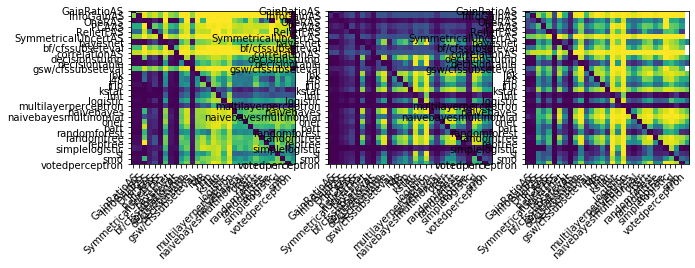

Timeout: 300(index 1)


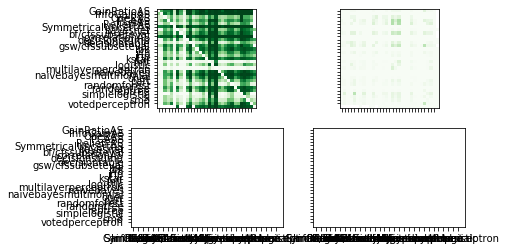

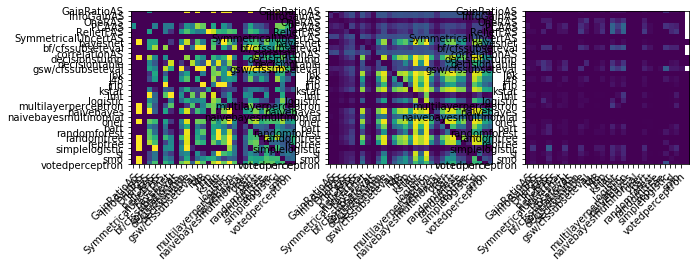

Timeout: 600(index 2)


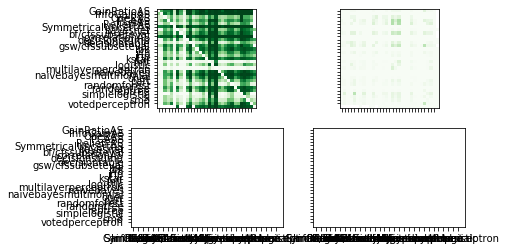

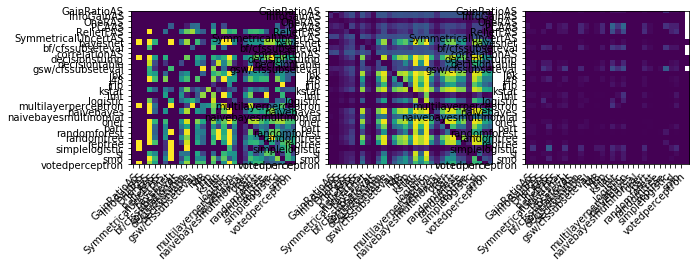

Timeout: 1200(index 3)


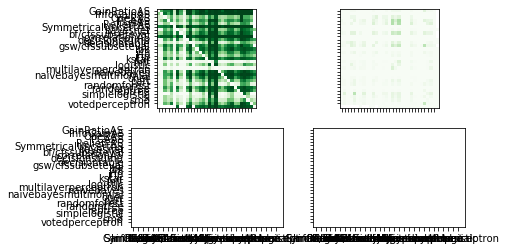

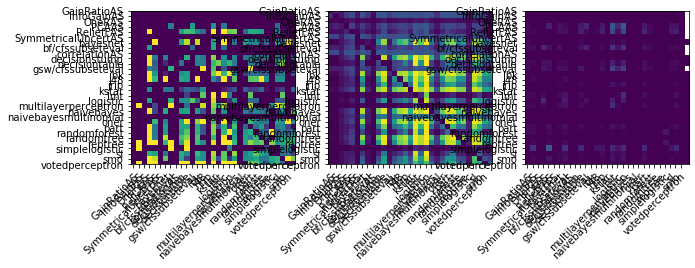

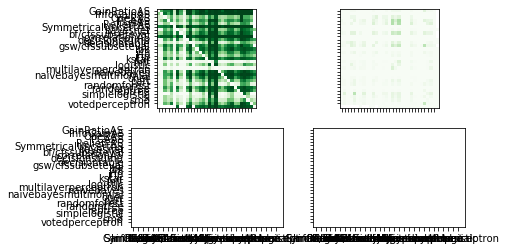

In [66]:
# plot the advantage tables (total and 70/30 split) for different timesouts
for t,to in enumerate(timeouts):
    
    print("Timeout: " + str(to) + "(index " + str(t) + ")")
    
    fig, ax = plt.subplots(1, 3, figsize=(10,3))
    a = ax[0]
    im = a.imshow(advTable[t], cmap='viridis', vmin=0, vmax=1)
    a.set_xticks(np.arange(len(classifiers) - 1))
    a.set_xticklabels(classifiers)
    a.set_yticks(np.arange(len(classifiers) - 1))
    a.set_yticklabels(classifiers)
    plt.setp(a.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    a = ax[1]
    im = a.imshow(advTableAvg, cmap='viridis', vmin=0, vmax=1)
    a.set_xticks(np.arange(len(classifiers) - 1))
    a.set_xticklabels(classifiers)
    a.set_yticks(np.arange(len(classifiers) - 1))
    a.set_yticklabels(classifiers)
    plt.setp(a.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    a = ax[2]
    im = a.imshow(advTableTotal[t], cmap='viridis', vmin=0, vmax=1)
    a.set_xticks(np.arange(len(classifiers) - 1))
    a.set_xticklabels(classifiers)
    a.set_yticks(np.arange(len(classifiers) - 1))
    a.set_yticklabels(classifiers)
    plt.setp(a.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    plt.savefig("rule-heatmaps.pdf")
    plt.show()

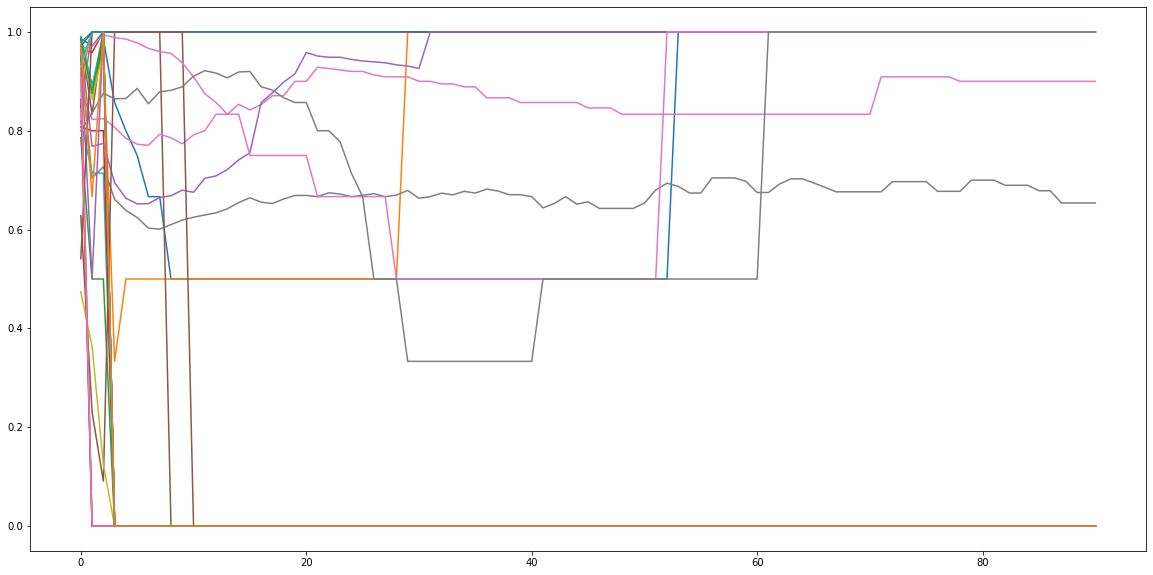

In [321]:
# Observe if any of the rules has at least for one timeout a support of .9
frequent = np.where(np.max(advTableTotal, axis=0) > .8)
plt.figure(figsize=(20,10))
for i,x in enumerate(frequent[0]):
    y = frequent[1][i]
    series = advTableTrain[:,x,y]
    plt.plot(series)
plt.show()

## Posterior Dominance Rules for the 70/30 splits

In [152]:
# define feature columns
featureCols = list(df.columns)
featureCols.remove("fittime")
featureCols.remove("applicationtime")

attributes = featureCols.copy()
attributes.remove("algorithm")
attributes.remove("algorithmoptions")
attributes.remove("seed")
attributes.remove("openmlid")

In [302]:
## Second, consider all possible pairs of classifiers
## For each pair, train a binary classifier based on the observed data that will predict the runtime dominance
## i.e. will predict whether c1 runs faster than c2 on a given dataset
models = [[0 for x in range(len(algorithms))] for y in range(len(algorithms))] 
predictabilities_posterior = np.zeros([len(algorithms), len(algorithms)])
realizedCuts_posterior = np.zeros([len(algorithms), len(algorithms)])
correctlyRealizedCuts_posterior = np.zeros([len(algorithms), len(algorithms)])
incorrectlyRealizedCuts_posterior = np.zeros([len(algorithms), len(algorithms)])
possibleCuts_posterior = np.zeros([len(algorithms), len(algorithms)])
pbar = tqdm(total = len(algorithms) ** 2)
algorithmDFViews = {}
for a in algorithms:
    algorithmDFViews[a] = df[(df["algorithm"] == a) & (df["algorithmoptions"].isnull())] # only consider default algorithms
for i, c1 in enumerate(algorithms):
    dataWithClassifierC1 = algorithmDFViews[c1][["openmlid", "seed", "fitsize", "numattributes", "fittime", "applicationtime"]]
    for j, c2 in enumerate(algorithms):
        if c1 != c2:
            dataWithClassifierC2 = algorithmDFViews[c2]
            join = dataWithClassifierC1.merge(dataWithClassifierC2, on=["openmlid", "seed", "fitsize", "numattributes"])
            inds = join[["fittime_x", "applicationtime_x", "fittime_y", "applicationtime_y"]].dropna().index.values
            join = join.loc[inds,:]
            targetData = join[["fittime_x", "applicationtime_x", "fittime_y", "applicationtime_y"]].values
            if len(targetData) >= 10: # require certain evaluability
                c1Times = targetData[:,0] + targetData[:,1]
                c2Times = targetData[:,2] + targetData[:,3]
                adjc2Times = []
                for t in c2Times:
                    if t > 10 and t <= 60:
                        t *= 1.1
                    if t > 60:
                        t += 5
                    adjc2Times.append(t)
                y = c1Times <= np.array(adjc2Times)

                # check where c1 and c2 timed out respectively
                casesInWhichC1Timedout = np.where(join["fittime_x"] + join["applicationtime_x"] >= 300)[0]
                rowsInWhichC1Timedout = join.iloc[casesInWhichC1Timedout]
                didPotentiallyDominatedTimeout = (rowsInWhichC1Timedout["fittime_y"] + rowsInWhichC1Timedout["applicationtime_y"] >= 300).values
                
                X = join[attributes].values
                predictionScores = []
                cuts = []
                cutScoresPositive = []
                cutScoresNegative = []
                numIterations = 2
                for seed in range(numIterations):
                    allIndices = [x for x in range(len(X)) if not x in casesInWhichC1Timedout]
                    np.random.shuffle(allIndices)
                    trainIndices = allIndices[:int(len(X) * .7)]
                    test1Indices = list(casesInWhichC1Timedout)
                    test2Indices = allIndices[int(len(X) * .7):]
                    Xtrain = X[trainIndices,:]
                    Xtest1 = X[test1Indices,:]
                    Xtest2 = X[test2Indices,:]
                    Ytrain = y[trainIndices]
                    Ytest1 = y[test1Indices]
                    Ytest2 = y[test2Indices]
                    c.fit(np.nan_to_num(Xtrain), np.nan_to_num(Ytrain))
                    if len(Xtest2) > 0: # this is to assess the overall validation performance
                        predictions = c.predict(np.nan_to_num(Xtest2))
                        score = np.count_nonzero(predictions == Ytest2) / len(predictions)
                        print(c1 + "/" + c2 + ": " + str(score))
                        predictionScores.append(score)
                    if len(Xtest1) > 0: # this is to assess the validation performance for the RULE
                        predictions = c.predict(np.nan_to_num(Xtest1))
                        attempts = 0
                        correct = 0
                        incorrect = 0
                        for pIndex, prediction in enumerate(predictions):
                            if prediction:
                                attempts += 1
                                if didPotentiallyDominatedTimeout[pIndex]:
                                    correct += 1
                                else:
                                    incorrect += 1

                        scorePositive = correct / attempts if attempts > 0 else 0
                        scoreNegative = incorrect / attempts if attempts > 0 else 0
                        cutScoresPositive.append(scorePositive)
                        cutScoresNegative.append(scoreNegative)
                        cuts.append(attempts)
                    
                predictabilities_posterior[i][j] = np.mean(predictionScores) if len (predictionScores) > 0 else np.nan
                correctlyRealizedCuts_posterior[i][j] = np.mean(cutScoresPositive) if len (cutScoresPositive) > 0 else np.nan
                incorrectlyRealizedCuts_posterior[i][j] = np.mean(cutScoresNegative) if len (cutScoresNegative) > 0 else np.nan
                realizedCuts_posterior[i][j] = np.mean(cuts) if len (cuts) > 0 else np.nan
                possibleCuts_posterior[i][j] = np.count_nonzero(didPotentiallyDominatedTimeout) if len (didPotentiallyDominatedTimeout) > 0 else np.nan
                #activeCutScores_posterior[i][j] /= numIterations
                #print(c1 + "/" + c2)
                #print(predictabilities[i][j])
                #print(str(realizedCuts[i][j]) + "/" + str(possibleCuts[i][j]))
                #print(str(correctlyRealizedCuts[i][j]) + " <-> " + str(incorrectlyRealizedCuts[i][j]))
        pbar.update(1)
pbar.close()

GainRatioAS/InfoGainAS: 0.8194005449591281
GainRatioAS/InfoGainAS: 0.8260490463215259
GainRatioAS/OneRAS: 1.0
GainRatioAS/OneRAS: 1.0
GainRatioAS/PCAAS: 0.8744025491237387
GainRatioAS/PCAAS: 0.8706850770047796
GainRatioAS/ReliefFAS: 0.9036210182412198
GainRatioAS/ReliefFAS: 0.9004900626191125
GainRatioAS/SymmetricalUncertAS: 0.8176946631671042
GainRatioAS/SymmetricalUncertAS: 0.8131014873140857
GainRatioAS/bayesnet: 1.0
GainRatioAS/bayesnet: 1.0
GainRatioAS/bf/cfssubseteval: 0.8647175421209118
GainRatioAS/bf/cfssubseteval: 0.8683102081268583
GainRatioAS/correlationAS: 0.8086222627737226
GainRatioAS/correlationAS: 0.8156934306569343
GainRatioAS/decisionstump: 1.0
GainRatioAS/decisionstump: 1.0
GainRatioAS/decisiontable: 1.0
GainRatioAS/decisiontable: 1.0
GainRatioAS/gsw/cfssubseteval: 0.859542530378842
GainRatioAS/gsw/cfssubseteval: 0.8543006909697403
GainRatioAS/ibk: 1.0
GainRatioAS/ibk: 1.0
GainRatioAS/j48: 1.0
GainRatioAS/j48: 1.0
GainRatioAS/jrip: 1.0
GainRatioAS/jrip: 1.0
GainRatio

SymmetricalUncertAS/InfoGainAS: 0.8923133708590938
SymmetricalUncertAS/OneRAS: 1.0
SymmetricalUncertAS/OneRAS: 1.0
SymmetricalUncertAS/PCAAS: 0.9371768936839739
SymmetricalUncertAS/PCAAS: 0.9400988986289054
SymmetricalUncertAS/ReliefFAS: 0.9517114209980408
SymmetricalUncertAS/ReliefFAS: 0.9517114209980408
SymmetricalUncertAS/bayesnet: 1.0
SymmetricalUncertAS/bayesnet: 1.0
SymmetricalUncertAS/bf/cfssubseteval: 0.9322496067121133
SymmetricalUncertAS/bf/cfssubseteval: 0.9267960146827477
SymmetricalUncertAS/correlationAS: 0.8947114456668597
SymmetricalUncertAS/correlationAS: 0.8951939779965258
SymmetricalUncertAS/decisionstump: 1.0
SymmetricalUncertAS/decisionstump: 1.0
SymmetricalUncertAS/decisiontable: 1.0
SymmetricalUncertAS/decisiontable: 1.0
SymmetricalUncertAS/gsw/cfssubseteval: 0.9254257784944069
SymmetricalUncertAS/gsw/cfssubseteval: 0.9242164667943162
SymmetricalUncertAS/ibk: 1.0
SymmetricalUncertAS/ibk: 1.0
SymmetricalUncertAS/j48: 1.0
SymmetricalUncertAS/j48: 1.0
SymmetricalUnce

decisionstump/InfoGainAS: 0.9864864864864865
decisionstump/InfoGainAS: 0.9864864864864865
decisionstump/PCAAS: 0.9420289855072463
decisionstump/PCAAS: 0.9710144927536232
decisionstump/ReliefFAS: 0.873015873015873
decisionstump/ReliefFAS: 0.9523809523809523
decisionstump/SymmetricalUncertAS: 0.9864864864864865
decisionstump/SymmetricalUncertAS: 1.0
decisionstump/bayesnet: 0.6527797325826883
decisionstump/bayesnet: 0.6561576354679803
decisionstump/bf/cfssubseteval: 1.0
decisionstump/bf/cfssubseteval: 0.9859154929577465
decisionstump/correlationAS: 0.9857142857142858
decisionstump/correlationAS: 1.0
decisionstump/decisiontable: 0.7138827023014105
decisionstump/decisiontable: 0.7115070527097254
decisionstump/gsw/cfssubseteval: 0.9855072463768116
decisionstump/gsw/cfssubseteval: 0.9855072463768116
decisionstump/ibk: 0.7258444619010213
decisionstump/ibk: 0.7420267085624509
decisionstump/j48: 0.6782608695652174
decisionstump/j48: 0.697025171624714
decisionstump/jrip: 0.7507360157016683
decisi

ibk/naivebayesmultinomial: 0.6870189840944074
ibk/oner: 0.6715599051008304
ibk/oner: 0.6820877817319099
ibk/part: 0.6847189695550351
ibk/part: 0.6807669789227166
ibk/randomforest: 0.6930707512764406
ibk/randomforest: 0.7016776075857039
ibk/randomtree: 0.6880610412926391
ibk/randomtree: 0.6897067624177139
ibk/reptree: 0.698139753009223
ibk/reptree: 0.703298421134907
ibk/sl: 0.7108792846497765
ibk/sl: 0.7119970193740686
ibk/smo: 0.6939825132864735
ibk/smo: 0.6936396365506601
ibk/votedperceptron: 0.6912345966054406
ibk/votedperceptron: 0.6891420599860497
ibk/zeror: 0.6645089698538931
ibk/zeror: 0.6798594414647678
j48/GainRatioAS: 1.0
j48/GainRatioAS: 0.92
j48/InfoGainAS: 0.96875
j48/InfoGainAS: 1.0
j48/PCAAS: 0.9375
j48/PCAAS: 0.9375
j48/ReliefFAS: 0.8666666666666667
j48/ReliefFAS: 0.8666666666666667
j48/SymmetricalUncertAS: 1.0
j48/SymmetricalUncertAS: 1.0
j48/bayesnet: 0.6011183597390494
j48/bayesnet: 0.6220876048462255
j48/bf/cfssubseteval: 0.9032258064516129
j48/bf/cfssubseteval: 0.93

logistic/j48: 0.6739305891848265
logistic/j48: 0.6868442292171105
logistic/jrip: 0.7583798882681564
logistic/jrip: 0.75
logistic/kstar: 0.8884404727587201
logistic/kstar: 0.885269530123955
logistic/lmt: 0.7938970778381174
logistic/lmt: 0.7817429531936902
logistic/multilayerperceptron: 0.8387027949647963
logistic/multilayerperceptron: 0.838062726690847
logistic/naivebayes: 0.6963406805050288
logistic/naivebayes: 0.7046864968970683
logistic/naivebayesmultinomial: 0.6682847896440129
logistic/naivebayesmultinomial: 0.651294498381877
logistic/oner: 0.6543580936024045
logistic/oner: 0.6657363675397167
logistic/part: 0.6900194007329166
logistic/part: 0.7029532226773011
logistic/randomforest: 0.7318353632927341
logistic/randomforest: 0.7366652666946661
logistic/randomtree: 0.6920738327904452
logistic/randomtree: 0.6879478827361564
logistic/reptree: 0.7259380097879282
logistic/reptree: 0.7217431834071312
logistic/sl: 0.7595441595441595
logistic/sl: 0.7700854700854701
logistic/smo: 0.73760167934

naivebayesmultinomial/randomforest: 0.7214845080013619
naivebayesmultinomial/randomforest: 0.7119509703779366
naivebayesmultinomial/randomtree: 0.5917038052793966
naivebayesmultinomial/randomtree: 0.5855330819334933
naivebayesmultinomial/reptree: 0.6372447213568709
naivebayesmultinomial/reptree: 0.6230529595015576
naivebayesmultinomial/sl: 0.7032096706961234
naivebayesmultinomial/sl: 0.7032096706961234
naivebayesmultinomial/smo: 0.6775377089278435
naivebayesmultinomial/smo: 0.6771300448430493
naivebayesmultinomial/votedperceptron: 0.6468788249694002
naivebayesmultinomial/votedperceptron: 0.6499388004895961
naivebayesmultinomial/zeror: 0.6156882091761223
naivebayesmultinomial/zeror: 0.6393685249136655
oner/GainRatioAS: 0.9852941176470589
oner/GainRatioAS: 1.0
oner/InfoGainAS: 0.974025974025974
oner/InfoGainAS: 0.948051948051948
oner/PCAAS: 0.918918918918919
oner/PCAAS: 0.8378378378378378
oner/ReliefFAS: 0.927536231884058
oner/ReliefFAS: 0.927536231884058
oner/SymmetricalUncertAS: 0.9870

randomtree/logistic: 0.8272877923034432
randomtree/multilayerperceptron: 0.9123252858958069
randomtree/multilayerperceptron: 0.9116322051519002
randomtree/naivebayes: 0.7855603448275862
randomtree/naivebayes: 0.7877155172413793
randomtree/naivebayesmultinomial: 0.7510772290354657
randomtree/naivebayesmultinomial: 0.7550546900894929
randomtree/oner: 0.7383739662764472
randomtree/oner: 0.7391257652239287
randomtree/part: 0.7441021942927785
randomtree/part: 0.7371999587926239
randomtree/randomforest: 0.8510160427807487
randomtree/randomforest: 0.8452406417112299
randomtree/reptree: 0.7537354731599336
randomtree/reptree: 0.7529607083563918
randomtree/sl: 0.8303667745415318
randomtree/sl: 0.8252427184466019
randomtree/smo: 0.8045873910814967
randomtree/smo: 0.8018964633521272
randomtree/votedperceptron: 0.8174288179465056
randomtree/votedperceptron: 0.8203623813632441
randomtree/zeror: 0.7693923270792495
randomtree/zeror: 0.7614113693643237
reptree/GainRatioAS: 0.9775280898876404
reptree/Ga

votedperceptron/lmt: 0.7252162341982701
votedperceptron/logistic: 0.7117167743748244
votedperceptron/logistic: 0.7027254846867097
votedperceptron/multilayerperceptron: 0.8282548476454293
votedperceptron/multilayerperceptron: 0.8289935364727609
votedperceptron/naivebayes: 0.6880685794261722
votedperceptron/naivebayes: 0.6824702589223233
votedperceptron/naivebayesmultinomial: 0.6662857142857143
votedperceptron/naivebayesmultinomial: 0.688
votedperceptron/oner: 0.6770434782608695
votedperceptron/oner: 0.6857391304347826
votedperceptron/part: 0.691324815063887
votedperceptron/part: 0.6814055144586416
votedperceptron/randomforest: 0.7149557060969255
votedperceptron/randomforest: 0.711134271321869
votedperceptron/randomtree: 0.6757596685082873
votedperceptron/randomtree: 0.6781767955801105
votedperceptron/reptree: 0.6712079927338783
votedperceptron/reptree: 0.6761126248864668
votedperceptron/sl: 0.702215464813206
votedperceptron/sl: 0.6898349261511729
votedperceptron/smo: 0.6755373592630501


## Overall Summary of Prior and Posterior Dominances

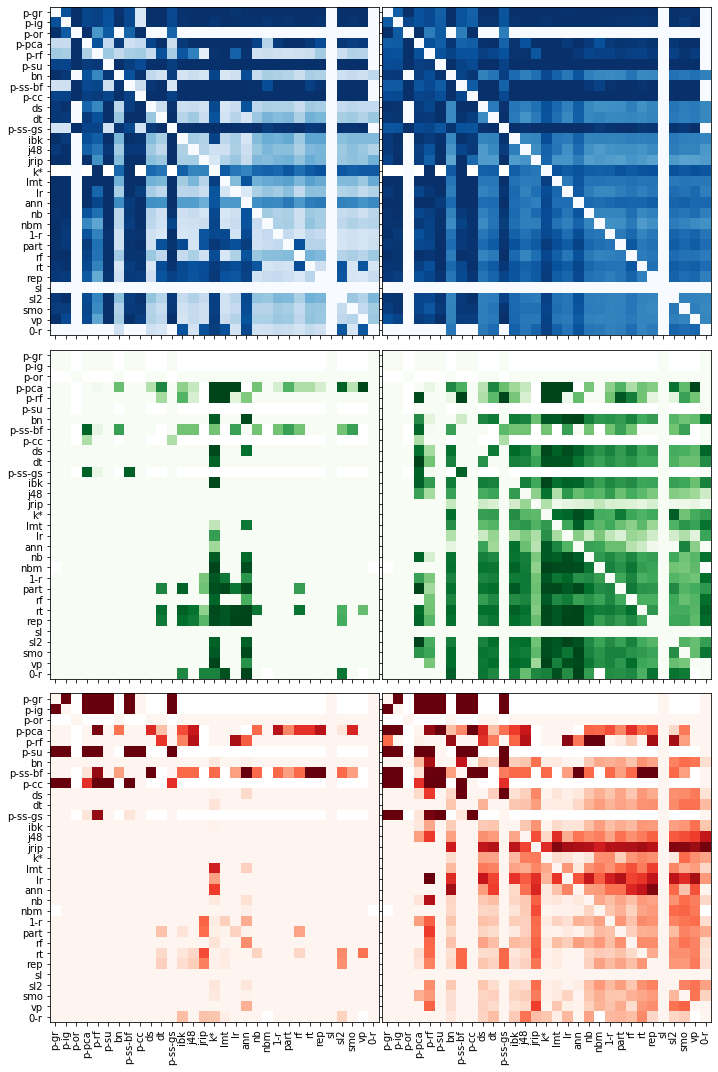

In [303]:
fig, ax = plt.subplots(3, 2, figsize=(10,15), sharex = True, sharey = True)
classifierLabels = [algorithmshortcuts[c] for c in algorithms]

# First plot the prior-dominance rule results on the left
a = ax[0][0]
a.imshow(predictabilities_prior, cmap='Blues', vmin=0, vmax=1)
a.set_yticks(np.arange(len(classifierLabels)))
a.set_yticklabels(classifierLabels)

a = ax[1][0]
a.imshow(correctlyRealizedCuts_prior, cmap='Greens', vmin=0, vmax=1)
a.set_yticks(np.arange(len(classifierLabels)))
a.set_yticklabels(classifierLabels)

a = ax[2][0]
a.imshow(incorrectlyRealizedCuts_prior, cmap='Reds', vmin=0, vmax=1)
a.set_yticks(np.arange(len(classifierLabels)))
a.set_yticklabels(classifierLabels)
a.set_xticks(np.arange(len(classifierLabels)))
a.set_xticklabels(classifierLabels, rotation=90)

# Second, plot the posterior-dominance rule results on the right
a = ax[0][1]
a.imshow(predictabilities_posterior, cmap='Blues', vmin=0, vmax=1)

a = ax[1][1]
a.imshow(correctlyRealizedCuts_posterior, cmap='Greens', vmin=0, vmax=1)

a = ax[2][1]
a.imshow(incorrectlyRealizedCuts_posterior, cmap='Reds', vmin=0, vmax=1)
a.set_xticks(np.arange(len(classifierLabels)))
a.set_xticklabels(classifierLabels, rotation=90)

plt.tight_layout()
plt.savefig("plots/priorvsposteriorrules.pdf")
pass

In [201]:
for i, c1 in enumerate(classifiers):
    for j, c2 in enumerate(classifiers):
        p = predictabilities[i][j]
        if p > .9:
            print ("Predictability of " + c1 + " vs " + c2 + " is " + str(p))

Predictability of GainRatioAS vs SymmetricalUncertAS is 0.9043635170603674
Predictability of GainRatioAS vs correlationAS is 0.9093864051094891
Predictability of InfoGainAS vs SymmetricalUncertAS is 0.9021889720144084
Predictability of InfoGainAS vs correlationAS is 0.9058529072006161
Predictability of PCAAS vs SymmetricalUncertAS is 0.9480512310919731
Predictability of PCAAS vs correlationAS is 0.9311037461082656
Predictability of PCAAS vs gsw/cfssubseteval is 0.9073291413256366
Predictability of PCAAS vs randomforest is 0.9333333333333333
Predictability of PCAAS vs votedperceptron is 0.9230769230769231
Predictability of ReliefFAS vs GainRatioAS is 0.9113091759205143
Predictability of ReliefFAS vs InfoGainAS is 0.9137655308155985
Predictability of ReliefFAS vs SymmetricalUncertAS is 0.9573509443278607
Predictability of ReliefFAS vs bf/cfssubseteval is 0.9026897620053513
Predictability of ReliefFAS vs correlationAS is 0.9415519399249062
Predictability of ReliefFAS vs decisionstump is 0